# Redshift Data of DESIJ0215-2909

Author: Anowar Shajib, S M Rafee Adnan

## Load data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS

In [2]:
data, header = fits.getdata("DESIJ0215-2909_F140W_drz_sci.fits", header=True)

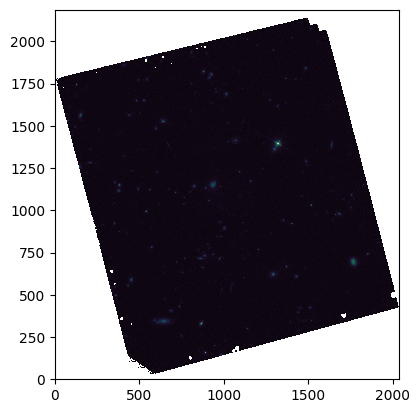

In [3]:
plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

In [5]:
FILENAME = "photo_z_DESIJ0215-2909.csv"  # need to be changed for each cluster file
data_legacy = pd.read_csv(FILENAME, delimiter=",")
data_legacy.head()

,_r,id,RAJ2000,DEJ2000,release,brickid,objid,type,pstar,gmmcomp,zphot,e_zphot,fclean,fqual
0,0.008009,8000169120006174,33.806766,-29.165113,8000,169120,6174,REX,0.010,R5,0.991,0.220,1,1
1,0.005728,8000169120006202,33.807974,-29.162941,8000,169120,6202,REX,0.001,R7,0.881,0.173,1,1
2,0.004854,8000169120006203,33.808620,-29.162070,8000,169120,6203,REX,0.020,R0,0.907,0.265,1,1
3,0.006876,8000169120006204,33.808412,-29.164098,8000,169120,6204,PSF,0.002,P3,1.135,0.262,1,1
4,0.005669,8000169120006261,33.805187,-29.162181,8000,169120,6261,PSF,0.004,P9,1.420,0.656,1,0


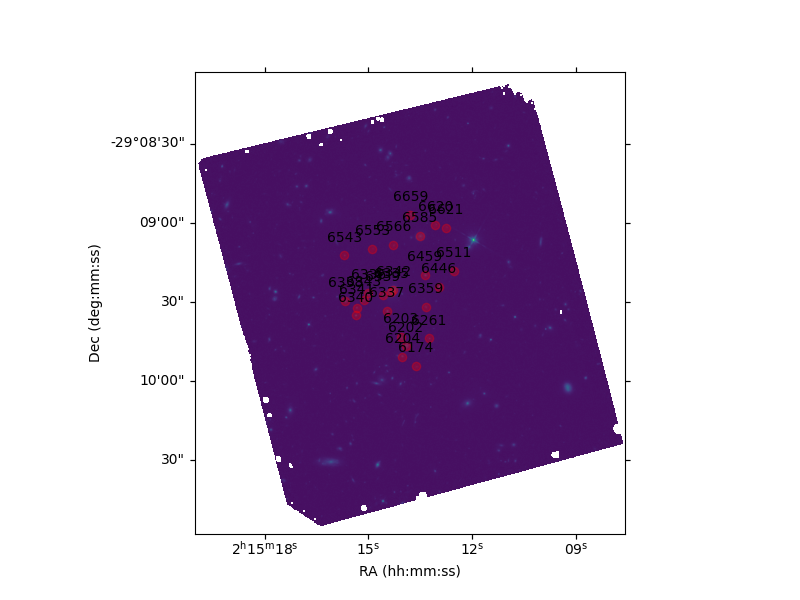

In [6]:
%matplotlib widget
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

In [12]:
# In degrees
center_x, center_y = 33.8083333, -29.1572222  # RA 02:15:14 DEC -29:09:26
radii = 20  # in arcsec
radii_deg = radii / 3600

x_upper, y_upper = center_x + radii_deg, center_y + radii_deg
x_lower, y_lower = center_x - radii_deg, center_y - radii_deg

x_limit_upper, y_limit_upper = wcs.all_world2pix(x_upper, y_upper, 0)
x_limit_lower, y_limit_lower = wcs.all_world2pix(x_lower, y_lower, 0)

print(x_limit_upper, x_limit_lower)

767.595896348601 1204.2425969432334


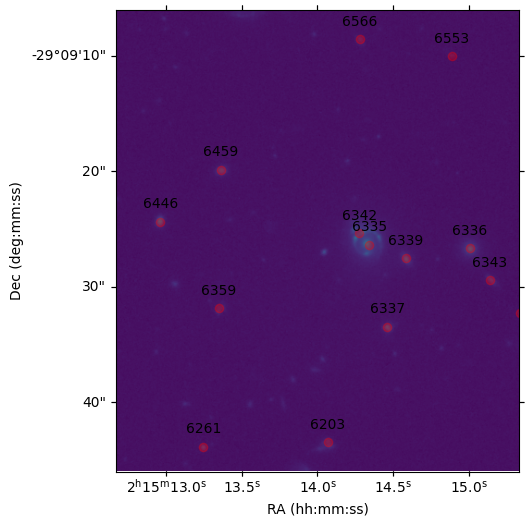

In [13]:
%matplotlib inline

wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

In [14]:
data_legacy.sort_values(by="objid")

object_ids = [6335, # central deflector
              6342, 6339, 6337, 6336]  

columns_to_drop = [
    "id",
    "RAJ2000",
    "DEJ2000",
    "release",
    "brickid",
]  # List of column names to drop
data_legacy_dropped = data_legacy.drop(columns=columns_to_drop)

selected_data_legacy = data_legacy_dropped[
    data_legacy_dropped["objid"].isin(object_ids)
]
selected_data_legacy.set_index("objid", inplace=True)

print(selected_data_legacy)

             _r type  pstar gmmcomp  zphot  e_zphot  fclean  fqual
objid                                                             
6337   0.002667  REX  0.001      R7  0.943    0.210       1      1
6335   0.001252  EXP  0.000      E7  0.941    0.120       0      0
6336   0.003669  REX  0.000      R6  0.921    0.070       1      1
6339   0.002161  REX  0.006      R6  1.027    0.116       0      0
6342   0.001026  DEV  0.004      D8  0.563    0.085       0      0
